In [1]:
%matplotlib inline
import numpy as np

angles = [-1.9367, -1.57397, -1.30476, -0.871566, -0.57881, -0.180617, 0.088762, 0.451829, 0.80315, 1.20124, 1.49388, 1.83324, 2.20757, 2.54663, 2.87384, 3.23588, 3.53933, 3.93585, 4.21552, 4.5881, 4.91379, 5.25078, 5.6106, 5.9584, 6.32889, 6.67575, 6.99904, 7.28731, 7.67877, 8.05803, 8.31047, 8.71141, 9.02602, 9.57351, 10.0625, 10.4707, 10.9569, 11.599, 12.115, 12.5621, 13.041, 13.4848, 14.0483, 14.5981, 15.1887, 15.6567, 16.1766, 16.554, 17.1868, 17.7304, 18.3234, 18.7971, 19.3202, 19.7364, 20.2226, 20.7877, 21.3181, 21.9355, 22.4376, 22.8566, 23.3224, 23.971, 24.5066, 24.9992]
angles.reverse()

short_plot = (6, 2)
small_plot = (15, 2)
medium_plot = (18, 10)
big_plot = (100, 3)

In [2]:
import matplotlib.pyplot as plt
import PIL.Image
import numpy as np
def read_image(image_name, cols):
    image = PIL.Image.open(image_name)

    np_image = np.array(image)
    np_image = np_image / 500.
    np_image = np.flipud(np_image)
    image_copy = np_image.copy()
    # mark needed columns with color
    for col in cols:
        image_copy[:,col] = 40

    plt.figure(figsize=small_plot)
    imgplot = plt.imshow(image_copy, origin='lower', cmap='jet')
    return np_image

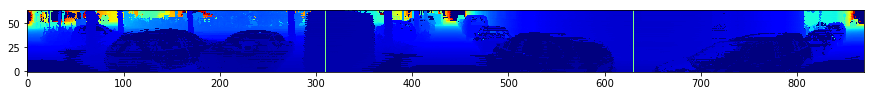

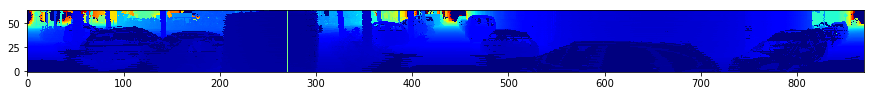

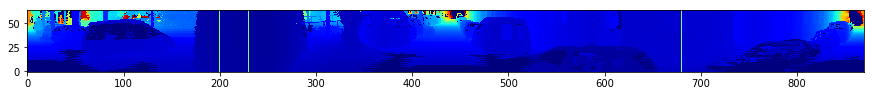

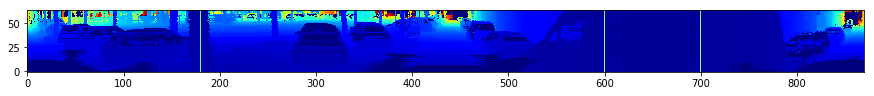

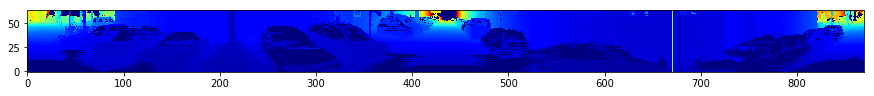

In [3]:
scans = ["scan10159.png", "scan10162.png", "scan10197.png", "scan10321.png", "scan00197.png"] 
picked_columns = [[310, 630], [270], [200, 230, 680], [180, 600, 700], [670]]
colors = ['red', 'blue', 'green', 'magenta', 'orange']

images = []
for scan_name, cols in zip(scans, picked_columns):
    images.append(read_image(scan_name, cols))

In [4]:
def draw_depth_at_col(col, image, color, start_idx=0, end_idx=64):
    y_list = list(range(0,len(angles)))
    lineplot = plt.plot(y_list[start_idx:end_idx], image[start_idx:end_idx, col], color)
    return image[:, col]

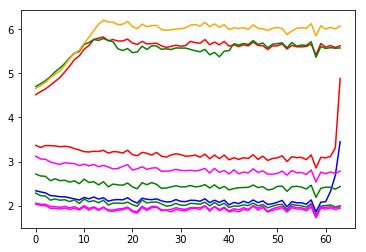

In [5]:
depth_cols = []
for image, cols, color in zip(images, picked_columns, colors):
    for col in cols:
        depth_cols.append((color, draw_depth_at_col(col, image, color)))

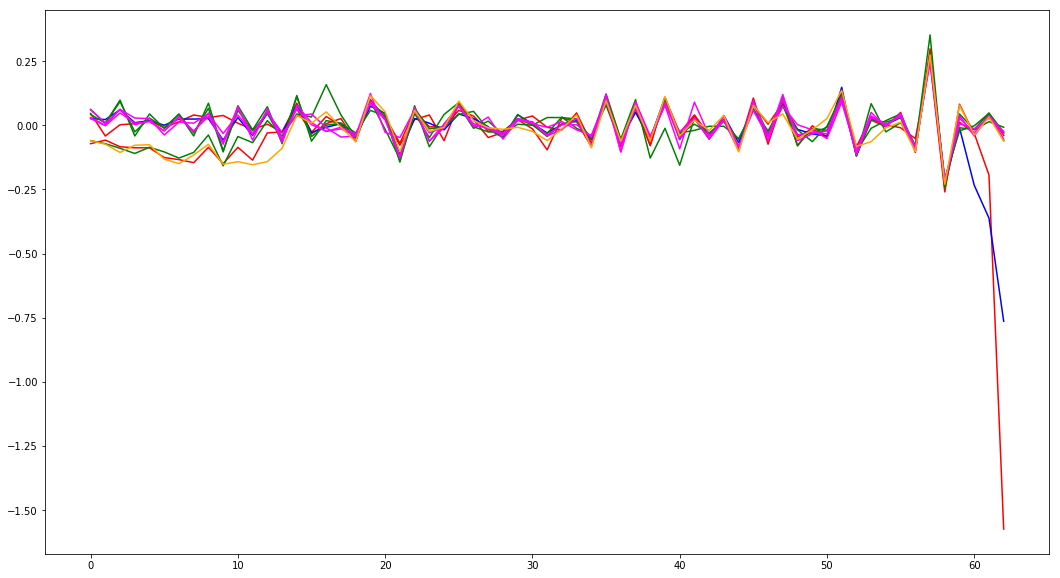

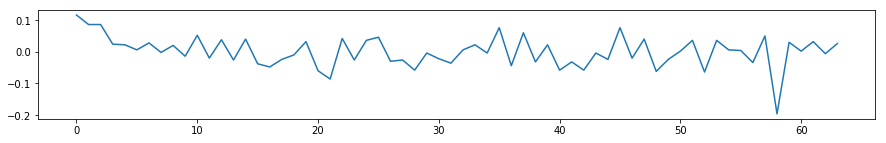

In [6]:
def plot_diff_to_prev(input_list, color):
    diff_array = [x - x_prev for x, x_prev in zip(input_list[:-1], input_list[1:])]
    plt.plot(diff_array, color) 
    return diff_array

start_idx = 0
end_idx = 64
plt.figure(figsize=medium_plot)
change_array = None
picked_array = None
for color, depth_col in depth_cols:
    diff_array = plot_diff_to_prev(depth_col[start_idx:end_idx], color)
    if color == 'magenta':
        change_array = diff_array
        picked_array = depth_col[start_idx:end_idx]

plt.figure(figsize=small_plot)
change_array = picked_array - np.mean(picked_array)
plt.plot(change_array)


[0.02587499999999987, -0.0061250000000001581, 0.031874999999999876, 0.001874999999999849, 0.029874999999999874, -0.1961250000000001, 0.049874999999999892, -0.034125000000000183, 0.0038749999999998508, 0.0058749999999998526, 0.035874999999999879, -0.064124999999999988, 0.035874999999999879, 0.001874999999999849, -0.024125000000000174, -0.062124999999999986, 0.039874999999999883, -0.020125000000000171, 0.075874999999999915, -0.024125000000000174, -0.0041250000000001563, -0.058124999999999982, -0.032125000000000181, -0.058124999999999982, 0.021874999999999867, -0.032125000000000181, 0.059874999999999901, -0.04412499999999997, 0.075874999999999915, -0.0041250000000001563, 0.021874999999999867, 0.0058749999999998526, -0.036125000000000185, -0.022125000000000172, -0.0041250000000001563, -0.058124999999999982, -0.026125000000000176, -0.030125000000000179, 0.045874999999999888, 0.035874999999999879, -0.026125000000000176, 0.041874999999999885, -0.086125000000000007, -0.060124999999999984, 0.03

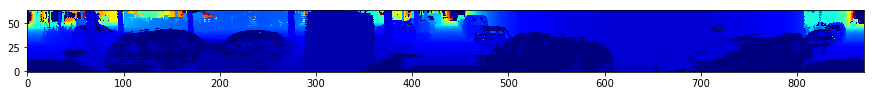

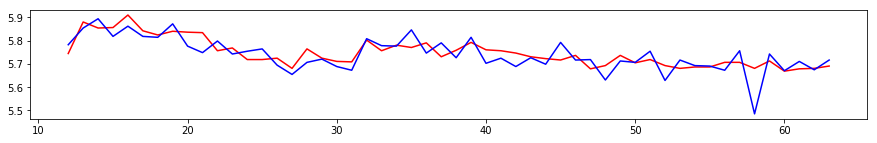

In [7]:
# apply correction to data
query_image = images[0]
fixed_image = query_image.copy()
for col in range(query_image.shape[1]):
    fixed_image[:, col] = query_image[:, col] - change_array
    
plt.figure(figsize=small_plot)
imgplot = plt.imshow(fixed_image, origin='lower', cmap='jet')

plt.figure(figsize=small_plot)
col = 620
depth_col = draw_depth_at_col(col, fixed_image, 'r', 12)
depth_col = draw_depth_at_col(col, query_image, 'b', 12)

change_array = list(change_array)
change_array.reverse()
print(change_array)